In [1]:
from pyemma import msm
import os
import pandas as pd
import numpy as np
import time
import yaml
import matplotlib.pyplot as plt
import sys
sys.path.append(os.getcwd())
import functions.visualise as vis

In [2]:
datestr = time.strftime("%Y%m%d-%HH%MM")
home = os.path.expanduser("~")
inpath = f"./data_gueniz/bac_data/bac_data_predicted/" #bac_data  larvae_data  nhr40_OP50  nothing_data  self_data
in_folder = os.path.basename(inpath)

In [3]:
config = yaml.safe_load(open("config.yml", "r"))

In [4]:
cluster_color = config['cluster_color']
cluster_group = config['cluster_group_man']
cluster_label = config['cluster_names']
clu_group_label = {_:f'{_}, {__}' for _, __ in tuple(zip([c for c in cluster_label.values()],[g for g in cluster_group.values()]))}
skip_already = config['settings']['skip_already']

In [5]:
loc = {}
data_batch = []
for fn in os.listdir(inpath):
    if "prediction.csv" in fn:
        loc[fn]= os.path.join(inpath, fn)
        data_batch.append(pd.read_csv(loc[fn]).values.flatten().tolist())

#data_batch_concat = pd.concat([d for d in data_batch], axis=0)
data_batch

[[5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,


In [6]:
mm = msm.estimate_markov_model(data_batch, 30)

In [26]:
print('active_set ', mm.active_set)
print('count_matrix_active\n', mm.count_matrix_active)
print('transition_matrix\n', mm.transition_matrix)
print('is reversible ',mm.is_reversible)
print('equilibrium distribution ', mm.stationary_distribution)
print('Relaxation timescales ', mm.timescales())

active_set  [1 3 4 5]
count_matrix_active
 [[3.2800e+02 3.0000e+01 3.0000e+02 0.0000e+00]
 [9.0000e+01 1.1279e+04 3.6270e+03 1.8000e+02]
 [2.4000e+02 3.4780e+03 9.2327e+04 1.2290e+03]
 [0.0000e+00 3.2900e+02 1.0200e+03 2.6320e+03]]
transition_matrix
 [[0.49848024 0.09070625 0.41081351 0.        ]
 [0.00397439 0.74321297 0.23559013 0.01722251]
 [0.00277242 0.036286   0.94914365 0.01179792]
 [0.         0.06220328 0.2766563  0.66114042]]
is reversible  True
equilibrium distribution  [0.00560789 0.1279872  0.83096851 0.0354364 ]
Relaxation timescales  [87.40847691 68.98503731 42.68042342]


/gpfs/soma_fs/home/boeger/usr/miniconda3/envs/markov/lib/python3.11/site-packages/deeptime/markov/tools/analysis/_api.py:256: UserWarning: truncated eigendecomposition to contain 4 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


In [ ]:
mm_transitionmatrix = pd.DataFrame(mm.transition_matrix, index=mm.active_set, columns=mm.active_set)
inactive_set = [i for i in [0,1,2,3,4,5] if i not in mm.active_set]
inactive_matrix = pd.DataFrame(0, index=inactive_set, columns=inactive_set)
extended_transitionmatrix = mm_transitionmatrix.join(inactive_matrix, how="outer").sort_index(axis = 1).fillna(0)

In [13]:
mm_distribution = pd.DataFrame(mm.stationary_distribution, index=mm.active_set, columns=['equi distr'])
inactive_distribution = pd.DataFrame(0, index=inactive_set, columns=['equi distr'])
extended_distribution = pd.concat([mm_distribution,inactive_distribution]).sort_index()

,equi distr
0,0.000000
1,0.005608
2,0.000000
3,0.127987
4,0.830969
5,0.035436


None


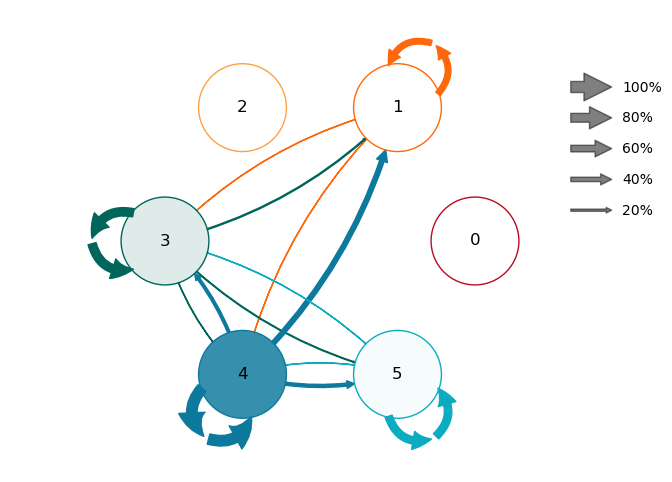

In [31]:
vis.transition_plotter(extended_transitionmatrix.values, cluster_color, node_alpha=extended_distribution.T.values.flatten())
plt.show()